In [3]:
import numpy 
import pandas 


In [5]:
import numpy as np
import pandas as pd
pd.read_csv(r"C:\Users\anilr\Downloads\Myocardial infarction complications Database (2).csv")


,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1696,77.0,0,0.0,4.0,2.0,1.0,NaN,2.0,0.0,...,0,0,1,0,1,0,0,0,0,3
1696,1697,70.0,0,0.0,6.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1697,1698,55.0,1,3.0,6.0,2.0,2.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6
1698,1699,79.0,0,2.0,2.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,1,0,0,0,0,0,1


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings

from sklearn.pipeline import Pipeline
from matplotlib.collections import PathCollection
from matplotlib.colors import ListedColormap
from statsmodels.graphics.gofplots import qqplot
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV, train_test_split, learning_curve, ShuffleSplit, cross_val_score, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge, Perceptron, LogisticRegression
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier

warnings.simplefilter(action='ignore', category=FutureWarning)

In [19]:
df= pd.read_csv(r"C:\Users\anilr\Downloads\Myocardial infarction complications Database (2).csv")
nd = df[['AGE', 'SEX', 'endocr_02', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'endocr_01', 'INF_ANAM', 'ant_im', 'lat_im', 'post_im', 'IM_PG_P', 'LET_IS']]

nd.head(10).style.background_gradient(cmap='Greens')

,AGE,SEX,endocr_02,GB,SIM_GIPERT,DLIT_AG,endocr_01,INF_ANAM,ant_im,lat_im,post_im,IM_PG_P,LET_IS
0,77.000000,1,0.000000,3.000000,0.000000,7.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0
1,55.000000,1,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0
2,52.000000,1,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0
3,68.000000,0,0.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0
4,60.000000,1,0.000000,3.000000,0.000000,7.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0
5,64.000000,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0
6,70.000000,1,0.000000,2.000000,0.000000,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0
7,65.000000,1,0.000000,2.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
8,60.000000,1,0.000000,2.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0
9,77.000000,0,0.000000,3.000000,0.000000,6.000000,1.000000,2.000000,4.000000,1.000000,0.000000,0.000000,0


In [21]:
print('\033[1m'+'Dataframe dimension:'+'\033[0m')
print('*' * 30)
print('Number of lines:', nd.shape[0])
print('Number of columns:', nd.shape[1])
print('*' * 30)
print('\n')

print('\033[1m'+'Null values:'+'\033[0m')
print('*' * 30)
print(nd.isna().sum())
print('*' * 30)
print('\n')

print('\033[1m'+'\nDataframe info:\n'+'\033[0m')
nd.info(memory_usage = False)

Dataframe dimension:
******************************
Number of lines: 1700
Number of columns: 13
******************************


Null values:
******************************
AGE             8
SEX             0
endocr_02      10
GB              9
SIM_GIPERT      8
DLIT_AG       248
endocr_01      11
INF_ANAM        4
ant_im         83
lat_im         80
post_im        72
IM_PG_P         1
LET_IS          0
dtype: int64
******************************



Dataframe info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AGE         1692 non-null   float64
 1   SEX         1700 non-null   int64  
 2   endocr_02   1690 non-null   float64
 3   GB          1691 non-null   float64
 4   SIM_GIPERT  1692 non-null   float64
 5   DLIT_AG     1452 non-null   float64
 6   endocr_01   1689 non-null   float64
 7   INF_ANAM    1696 non-null   float64
 8   ant_im 

In [23]:
nd.isna().sum()


AGE             8
SEX             0
endocr_02      10
GB              9
SIM_GIPERT      8
DLIT_AG       248
endocr_01      11
INF_ANAM        4
ant_im         83
lat_im         80
post_im        72
IM_PG_P         1
LET_IS          0
dtype: int64

In [25]:
nd.dropna(inplace=True)

C:\Users\anilr\AppData\Local\Temp\ipykernel_23404\1029660640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nd.dropna(inplace=True)


In [27]:
nd.isna().sum()

AGE           0
SEX           0
endocr_02     0
GB            0
SIM_GIPERT    0
DLIT_AG       0
endocr_01     0
INF_ANAM      0
ant_im        0
lat_im        0
post_im       0
IM_PG_P       0
LET_IS        0
dtype: int64

In [51]:
import pandas as pd

# Load your existing data into a DataFrame called "df"
df = nd.iloc[1200:]

# Use pd.concat() to concatenate the DataFrame with itself 10 times
new_df = pd.concat([df]*10, ignore_index=True)

# Save the new DataFrame to a CSV file
new_df.to_csv('C:\\Users\\anilr\\Downloads\\Myocardial infarction complications Database (2).csv', index=False)


In [57]:
pd.read_csv(r"C:\Users\anilr\Downloads\Myocardial infarction complications Database (2).csv")

nd = df[['AGE', 'SEX', 'endocr_02', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'endocr_01', 'INF_ANAM', 'ant_im', 'lat_im', 'post_im', 'IM_PG_P', 'LET_IS']]

nd.info(memory_usage = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AGE         1640 non-null   float64
 1   SEX         1640 non-null   int64  
 2   endocr_02   1640 non-null   float64
 3   GB          1640 non-null   float64
 4   SIM_GIPERT  1640 non-null   float64
 5   DLIT_AG     1640 non-null   float64
 6   endocr_01   1640 non-null   float64
 7   INF_ANAM    1640 non-null   float64
 8   ant_im      1640 non-null   float64
 9   lat_im      1640 non-null   float64
 10  post_im     1640 non-null   float64
 11  IM_PG_P     1640 non-null   float64
 12  LET_IS      1640 non-null   int64  
dtypes: float64(11), int64(2)

In [55]:
nd.info(memory_usage = False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AGE         1640 non-null   float64
 1   SEX         1640 non-null   int64  
 2   endocr_02   1640 non-null   float64
 3   GB          1640 non-null   float64
 4   SIM_GIPERT  1640 non-null   float64
 5   DLIT_AG     1640 non-null   float64
 6   endocr_01   1640 non-null   float64
 7   INF_ANAM    1640 non-null   float64
 8   ant_im      1640 non-null   float64
 9   lat_im      1640 non-null   float64
 10  post_im     1640 non-null   float64
 11  IM_PG_P     1640 non-null   float64
 12  LET_IS      1640 non-null   int64  
dtypes: float64(11), int64(2)

In [61]:
print('\033[1m'+'Descriptive statistics:'+'\033[0m')
nd.describe().style.background_gradient(cmap='Greens')

Descriptive statistics:


,AGE,SEX,endocr_02,GB,SIM_GIPERT,DLIT_AG,endocr_01,INF_ANAM,ant_im,lat_im,post_im,IM_PG_P,LET_IS
count,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000
mean,66.975610,0.518293,0.054878,1.481707,0.054878,4.091463,0.213415,0.585366,2.341463,1.158537,0.286585,0.109756,3.189024
std,9.516660,0.499818,0.227812,1.155788,0.227812,3.036917,0.409843,0.862071,1.892276,1.053418,0.739088,0.312681,2.085922
min,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,61.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,67.000000,1.000000,0.000000,2.000000,0.000000,6.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,3.000000
75%,75.000000,1.000000,0.000000,2.000000,0.000000,7.000000,0.000000,1.000000,4.000000,2.000000,0.000000,0.000000,5.000000
max,90.000000,1.000000,1.000000,3.000000,1.000000,7.000000,1.000000,3.000000,4.000000,4.000000,4.000000,1.000000,7.000000


In [63]:
# train test split
from sklearn.model_selection import train_test_split

X = df.loc[:, ['AGE', 'SEX','SIM_GIPERT', 'endocr_02', 'GB','endocr_01' ]]
y = df['LET_IS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print('train size:', X_train.shape)
print('test size:', X_test.shape)

train size: (1230, 6)
test size: (410, 6)


In [65]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [67]:
# make predictions

pred = clf.predict(X_test)

In [69]:
# evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('accuracy score: ', accuracy_score(y_test, pred))

accuracy score:  0.7926829268292683


In [71]:
# evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('accuracy score: ', accuracy_score(y_test, pred))
print('precision score: ', precision_score(y_test, pred, average='micro'))
print('recall score: ', recall_score(y_test, pred, average='micro'))
print('f1 score: ', f1_score(y_test, pred, average='micro'))

accuracy score:  0.7926829268292683
precision score:  0.7926829268292683
recall score:  0.7926829268292683
f1 score:  0.7926829268292683


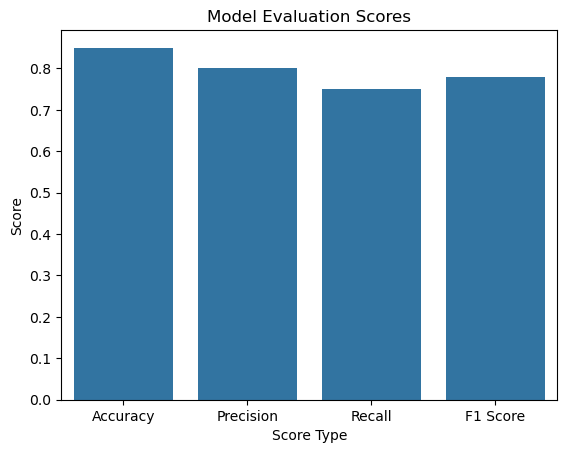

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example data for demonstration (replace these with actual scores)
accuracy_score = 0.85
precision_score = 0.80
recall_score = 0.75
f1_score = 0.78

# Create a dictionary of scores
scores = {'Accuracy': accuracy_score, 'Precision': precision_score, 'Recall': recall_score, 'F1 Score': f1_score}

# Convert scores dictionary to a Pandas DataFrame
df_scores = pd.DataFrame(list(scores.items()), columns=['Score Type', 'Score'])

# Create a bar plot using Seaborn
sns.barplot(x='Score Type', y='Score', data=df_scores)

# Set plot title and axis labels
plt.title('Model Evaluation Scores')
plt.xlabel('Score Type')
plt.ylabel('Score')

# Show the plot
plt.show()
